In [1]:
!pip install ultralytics supervision
!pip install git+https://github.com/NVlabs/describe-anything


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 850.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [2]:
!pip install --upgrade numpy




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 61.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dam 1.0.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


In [1]:
import time
import psutil
from IPython.display import display, Javascript

# Initialize tracking variables
if 'start_time' not in globals():
    start_time = time.time()
    initial_ram = psutil.virtual_memory().used / (1024 ** 3)  # GB
    print("Tracking started for all cells...")

Tracking started for all cells...


In [2]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import SAM, YOLO
from dam.describe_anything_model import DescribeAnythingModel

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
sam = SAM("sam2_b.pt").to(DEVICE)
print("SAM 2 model loaded")

100%|██████████| 154M/154M [00:04<00:00, 37.8MB/s]


SAM 2 model loaded


In [4]:
dam = DescribeAnythingModel(
    model_path="nvidia/DAM-3B",
    conv_mode="v1",
    prompt_mode="full+crop",
)
print("DAM model loaded")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/823M [00:00<?, ?B/s]

LICENSE:   0%|          | 0.00/4.09k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/989 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/927 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.37k [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/369 [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/36.7M [00:00<?, ?B/s]

trainer_state.json:   0%|          | 0.00/120k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/693 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/857M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/429M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

DAM model loaded


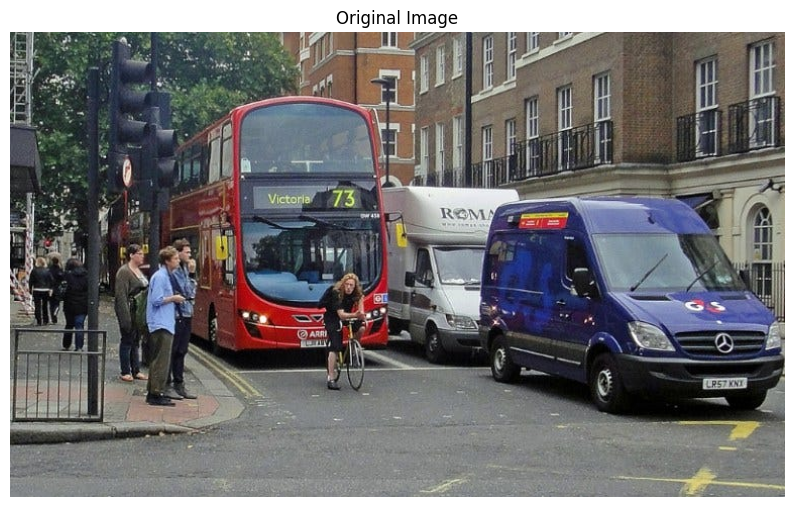

In [6]:
image_path = "/content/1_v0Bm-HQxWtpbQ0Yq463uqw.jpg"  # Replace with your image path
image_bgr = cv2.imread(image_path)
if image_bgr is None:
    raise FileNotFoundError(f"Image not found at {image_path}")
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.title("Original Image")
plt.show()


In [7]:
results = sam(image)
result = results[0]

masks_tensor = result.masks.data  # (num_masks, H, W)
masks = masks_tensor.cpu().numpy().astype(bool)

print(f"Generated {len(masks)} masks")



0: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 9566.2ms
Speed: 146.3ms preprocess, 9566.2ms inference, 2.2ms postprocess per image at shape (1, 3, 1024, 1024)
Generated 19 masks


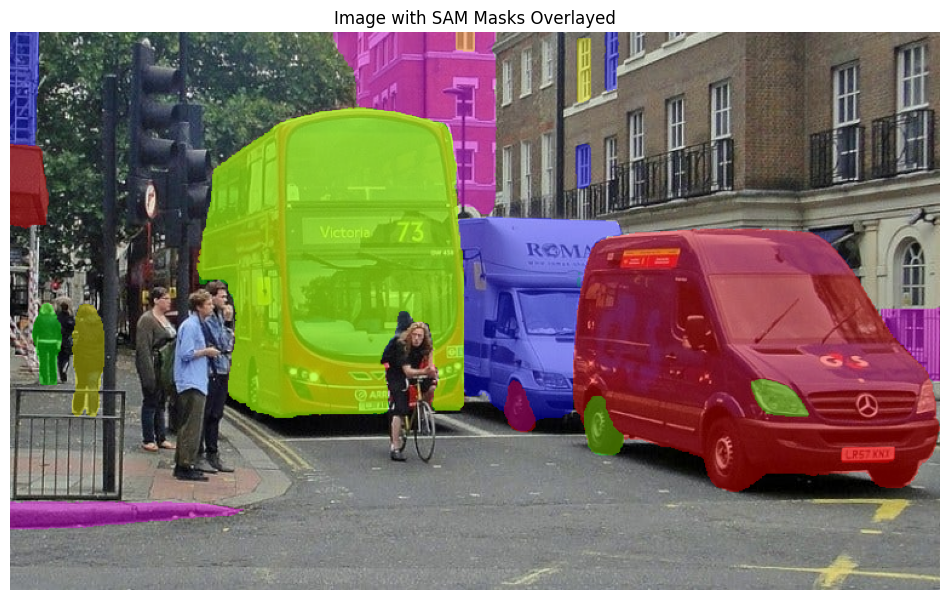

In [10]:
def overlay_mask(image, mask, color=(0, 255, 0), alpha=0.5):
    overlay = image.copy()
    mask_bool = mask.astype(bool)
    overlay[mask_bool] = (overlay[mask_bool] * (1 - alpha) + np.array(color) * alpha).astype(np.uint8)
    return overlay

colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255)]
image_vis = image.copy()

for i, mask in enumerate(masks):
    color = colors[i % len(colors)]
    image_vis = overlay_mask(image_vis, mask, color=color, alpha=0.4)

plt.figure(figsize=(12, 12))
plt.imshow(image_vis)
plt.axis('off')
plt.title("Image with SAM Masks Overlayed")
plt.show()


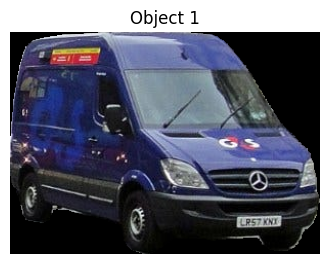

Description for Object 1:
A blue Mercedes-Benz Sprinter van with a high roof and a sliding side door. The van features a prominent front grille with the Mercedes-Benz logo, flanked by two large headlights. The front bumper is black, and there is a license plate mounted on the lower front. The side of the van displays a red and white logo with the letters "GS" in a stylized font. The windows are tinted, and there is a visible antenna on the roof.



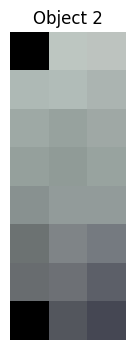

Description for Object 2:
The wall is a smooth, light gray surface with a subtle gradient, transitioning from a slightly darker gray at the top to a lighter gray towards the bottom.



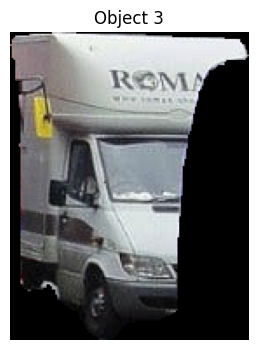

Description for Object 3:
A white van with a high roof and a sliding door on the side. The front end features a black grille with a centered emblem, flanked by rectangular headlights. Below the grille, there is a black bumper with integrated fog lights. The windshield is large and raked, with a visible wiper on the driver's side. The side mirrors are black and mounted on the doors. The van has a visible antenna on the roof towards the front.



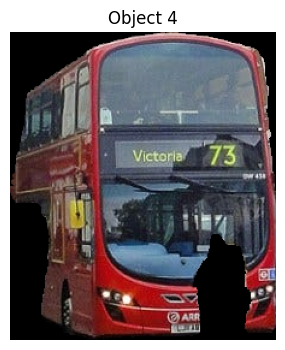

Description for Object 4:
A red double-decker bus with a curved front, displaying the destination "Victoria 73" on the top front panel. The bus has a black bumper, a set of headlights, and a windshield with a wiper on the right side. The lower deck has a visible door with a yellow panel on the left side, and the upper deck has tinted windows. The bus's registration plate is mounted on the lower front.



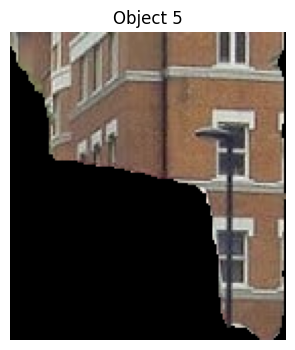

Description for Object 5:
A traditional-style streetlight with a black, ornate metal pole and a single lantern featuring a curved top and glass panes.



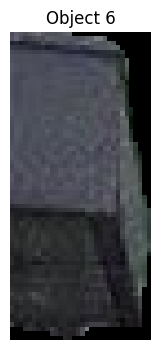

Description for Object 6:
The building features a dark, textured facade with a series of rectangular windows arranged in a grid pattern. The windows are framed by light-colored borders, creating a stark contrast against the dark exterior. The structure has a vertical orientation with a slight protrusion on the right side, adding depth to the design.



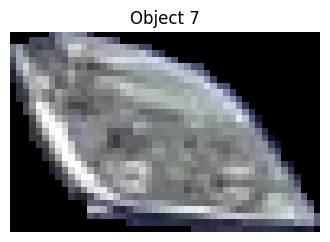

Description for Object 7:
The image shows a close-up of a car's headlight assembly, featuring a clear lens with a complex internal structure. The headlight has a prominent circular projector lens at the center, surrounded by a reflective housing. The assembly includes multiple smaller light elements and bulbs, likely for different beam patterns, and is encased in a black housing with a textured edge. The overall shape of the headlight is irregular, with a protruding section on the upper left side, suggesting a design that integrates with the vehicle's body lines.



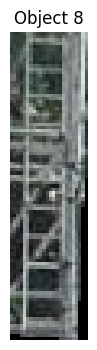

Description for Object 8:
A vertical, metal ladder with evenly spaced, flat rungs and side rails that extend beyond the topmost rung, creating a slight overhang.



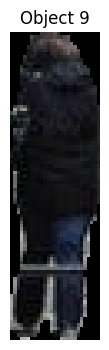

Description for Object 9:
A person with long, dark hair wearing a black jacket and blue jeans.



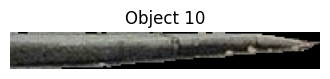

Description for Object 10:
A cylindrical pipe with a rough, textured surface, featuring a series of evenly spaced, raised rings encircling its body. The pipe tapers slightly towards one end and has a consistent diameter along its length.



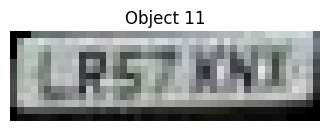

Description for Object 11:
LR57 XN



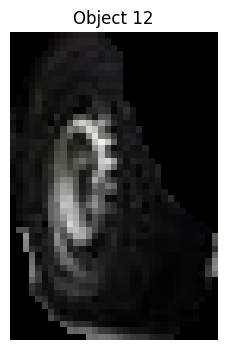

Description for Object 12:
A black and white image of a person's face with a prominent nose, closed lips, and a visible ear. The person has short hair and is wearing a dark-colored garment with a collar.



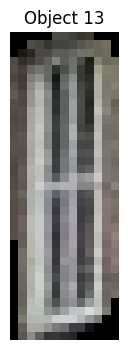

Description for Object 13:
A tall, rectangular window with a white frame and two vertical panes. The window has a horizontal bar dividing the two panes.



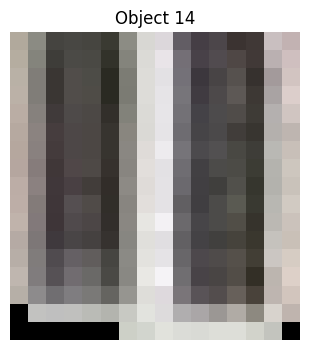

Description for Object 14:
A vertical, rectangular, black and white striped pattern with alternating thick and thin stripes.



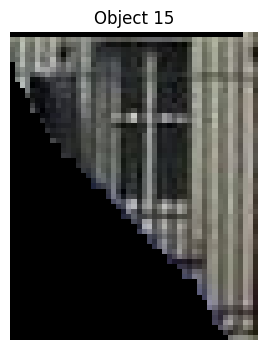

Description for Object 15:
The window consists of a series of vertical, rectangular panes arranged in a grid pattern. The panes are framed by thin, dark borders. The window is divided into two sections, with the upper section containing three vertical panes and the lower section containing two vertical panes. The panes are evenly spaced and aligned in a straight line.



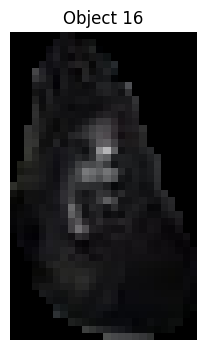

Description for Object 16:
A person with a serious expression, wearing a dark-colored outfit with a high collar and a patterned design on the shoulders. The individual has short hair and is looking slightly to the side with their mouth closed.



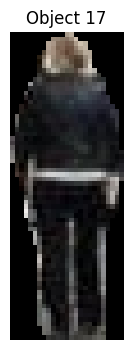

Description for Object 17:
A person with short, light-colored hair, wearing a dark jacket with a high collar and a dark shirt underneath. The person is also wearing dark pants and dark shoes.



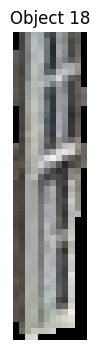

Description for Object 18:
A vertical, rectangular window with a white frame and multiple horizontal and vertical bars creating a grid pattern. The window has a clear glass pane.



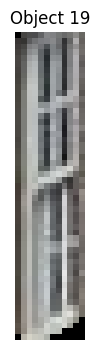

Description for Object 19:
A tall, narrow window with a white frame, divided into four vertical sections by white muntins. The window has a slightly reflective surface, showing faint reflections of the surrounding environment.



In [9]:
def numpy_to_pil(img_np):
    return Image.fromarray(img_np)

descriptions = []

for i, mask in enumerate(masks):
    # Convert mask to uint8 for contour detection
    mask_uint8 = mask.astype(np.uint8) * 255

    # Find bounding box of mask
    contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        continue
    x, y, w, h = cv2.boundingRect(contours[0])

    # Crop image and mask
    cropped_img = image[y:y+h, x:x+w]
    cropped_mask = mask_uint8[y:y+h, x:x+w]

    # Apply mask to crop
    masked_crop = cv2.bitwise_and(cropped_img, cropped_img, mask=cropped_mask)

    # Display cropped masked object
    plt.figure(figsize=(4,4))
    plt.title(f"Object {i+1}")
    plt.imshow(masked_crop)
    plt.axis('off')
    plt.show()

    # Convert to PIL Image for DAM
    cropped_pil = numpy_to_pil(masked_crop)

    # Generate description using correct DAM API
    description = dam.get_description(
        image_pil=cropped_pil,  # Pass cropped region
        mask_pil=Image.fromarray(cropped_mask),  # Mask for the cropped area
        query="<image> Describe this object in detail.",
        temperature=0.2,
        top_p=0.9,
        num_beams=1,
        max_new_tokens=512
    )

    print(f"Description for Object {i+1}:\n{description}\n")
    descriptions.append(description)
